## Quiz 3
- You must show your work (Python code) in the code cells.
- Answer the questions in the Markdown cells.
- You must submit this file to the Quiz3 Drop Box on D2L before 9:50am.


### Question 1: One-way ANOVA
Consider an inheritance study with beef animals. Five sires (male animals) were each mated to a separate group of dams (female animals). Birth weight of eight male calves (from different dams) in each of the five sire groups were recorded. The following Python code has created the data for you.

In [2]:
import pandas as pd
weight = [61, 100,  56, 113,  99, 103,  75,  62,  ## sire 1
            75, 102,  95, 103,  98, 115,  98,  94,  ## sire 2
            58,  60,  60,  57,  57,  59,  54, 100,  ## sire 3
            57,  56,  67,  59,  58, 121, 101, 101,  ## sire 4
            59,  46, 120, 115, 115,  93, 105,  75]  ## sire 5
sire = sum([["1"]*8, ["2"]*8, ["3"]*8,["4"]*8, ["5"]*8],[])
animals =pd.DataFrame({'weight':weight, 'sire':sire})
print(animals.head())
print(animals['sire'].dtypes)

   weight sire
0      61    1
1     100    1
2      56    1
3     113    1
4      99    1
object


(1) Visualize the data from the experiment using box-plot.

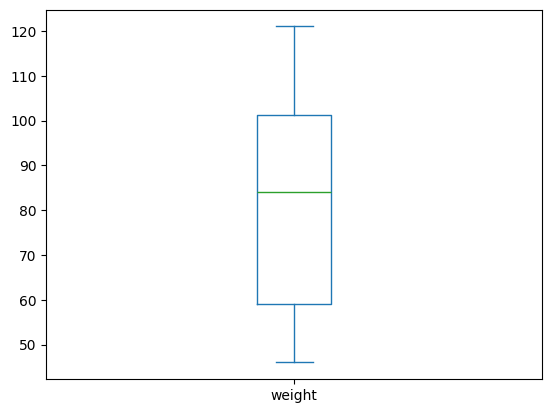

In [9]:
#code here
import matplotlib.pyplot as plt
animals.plot(kind="box")
plt.show()

(2) Fit the data using a fixed-effect model. Do you reject the null hypothesis that sire groups have same effectiveness on the weights of male calves at level 0.05?


**Answer:**

In [12]:
#code here
import statsmodels.api as sm
import statsmodels.formula.api as smf
model = smf.ols("weight ~ C(sire)", data=animals).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

            sum_sq    df         F    PR(>F)
C(sire)    5591.15   4.0  3.013819  0.030874
Residual  16232.75  35.0       NaN       NaN


The p-value is 0.03, which is less than 0.05, so we reject the null hypothesis

(3) Use Tukey’s method to conduct the post-hoc analysis among the five levels of age of the seeds and visualize the multiple comparisons at significance level 0.05. Write down your conclusions (that is, explain how many groups are formed).

**Answer:**

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     1      2   13.875 0.6998 -17.0834 44.8334  False
     1      3    -20.5 0.3342 -51.4584 10.4584  False
     1      4   -6.125 0.9787 -37.0834 24.8334  False
     1      5    7.375 0.9584 -23.5834 38.3334  False
     2      3  -34.375 0.0233 -65.3334 -3.4166   True
     2      4    -20.0 0.3585 -50.9584 10.9584  False
     2      5     -6.5 0.9736 -37.4584 24.4584  False
     3      4   14.375 0.6718 -16.5834 45.3334  False
     3      5   27.875 0.0945  -3.0834 58.8334  False
     4      5     13.5 0.7204 -17.4584 44.4584  False
-----------------------------------------------------


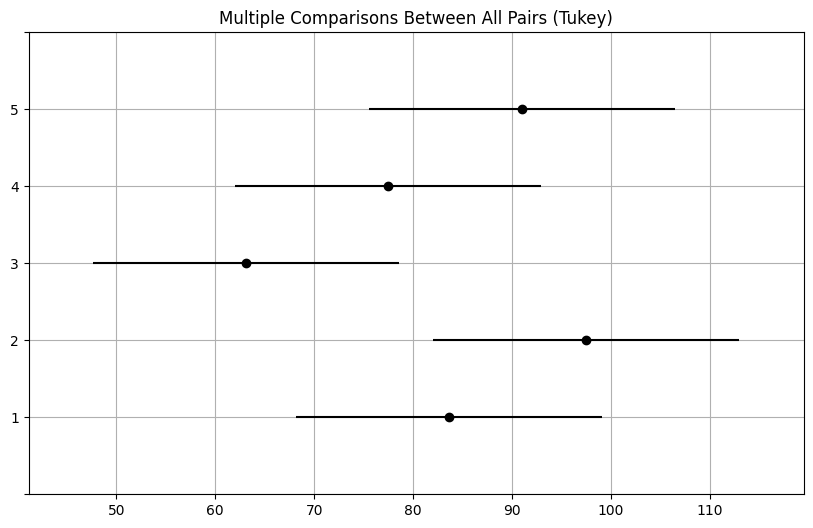

In [14]:
#code here
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=animals['weight'], groups=animals['sire'], alpha=0.05)

print(tukey)

tukey.plot_simultaneous()
plt.grid(True)
plt.show()

Since there was only one rejection in the Tukey test, this means there are only two groups

### Question 2:  1-Way Frequency Table 
Assume you go hiking with your friends. Every evening, you draw lots who has to do the washing up.  But at the end of the trip, you seem to have done most of the work.

| You |Peter | Hans|Paul |Mary |Joe|
|---|---     |---  |---  |--- |---|
| 10 |6 | 5|4 |5 |3 |

Has there been any foul play here?  Verify your answer at significance level 0.05.

**Answer:**

In [16]:
## Code here
from scipy.stats import chisquare

observed = [10, 6, 5, 4, 5, 3]

expected = [33 / len(observed)] * 6
# print(expected)

stat, pval = chisquare(f_obs=observed, f_exp=expected)

print(stat, pval)

5.363636363636364 0.37313038594870584


Since the p-value is greater than 0.05, there is no significant evidence of foul play

###  Question 3:  2-Way Contingency Table
The following table shows the classification of gender and left/right-handed of a random sample of 100 students in a university.

|  |Right-handed |Left-handed  |
|--- |---| --- |
| Male |  43  | 9 |
| Female | 44 |4  |

Are the males more left-handed than females?  Verify your conclusion at significance level 0.05.  Use either Chi-square test or Fisher's exact test or both. 

**Answer:**

In [18]:
#code here
from scipy.stats import chi2_contingency

table = [[43, 9], [44, 4]]

chi2, p_val, dof, expected = chi2_contingency(table)

print(p_val / 2) # only looking at males, we can use a one sided approximation

0.150192385195283


The p-value is above 0.05, so there isn't significant evidence that men are more left handed than women